<img src="head.png">

<h1><center>Projet TSS</center></h1>
<h1><center>Débruitage d’une image</center></h1>

# Introduction
Les processus d'enregistrement (caméra, amplificateur,
quantificateur,...) des images induisent des interférences
, ce qui peut rendre la compréhension et le traitement de cette image plus difficile . L'objectif déclaré du filtrage est de
réduire les variations d'intensité dans chaque
région de l'image tout en préservant l'intégrité de la
Scènes : transitions fluides entre
régions,
les éléments d'image importants doivent être conservés
pour être améliorés.

<h1>1. Notions d’image et de bruit</h1>

<h2>1.1. Notion d’image</h2>
Une image est obtenue par transformation d'une scène réelle par un capteur. Le
signal obtenu est alors caractérisé par sa dimension et sa nature
La représentation informatique d'une image est nécessairement discrète alors que
l'image est de nature continue, donc pour un ordinateur une image est un ensemble de
pixels.
<h3>Types d’images</h3>
On distingue trois types d’images : $\\$
- Les images binaires "noir et blanc": Elles sont composées de pixels noirs ou
blanc (deux valeurs possibles 0 ou 1)$\\$
- Les images en niveau de gris : sont composées de pixels de valeurs scalaires
représentant la luminosité. En général, les valeurs sont entières entre 0 
(le noir)
et 255 (le blanc)$\\$
- Les Image en couleur (ou RGB) : sont composées de pixels dont les valeurs
sont soit scalaires (couleurs indexées) soit vectorielle (selon les trois
composantes)

<h2>1.2. Modèles de bruits de l’image</h2>
A chaque étape de l'acquisition d'une scène, des
perturbations (rayures, poussières, caméra,
amplification, quantification) vont détériorer la qualité
de l'image. Ces perturbations sont regroupées sous le
nom de "bruit d'image". Le bruit peut être groupé en
deux classes :
<h3>Bruit indépendant : (on parle de bruit aléatoire)</h3> 

<h3>Bruit qui dépend des données de l’image.</h3>
\[ y(i,j) = 	\omega(i,j) + n(i,j) \]

avec l’image y(i,j) est la somme de l’image réelle
𝜔(i,j) avec le bruit n(i,j) .

Le bruit n(i,j) est souvent décrit par sa
variance $ {\sigma}_{n}²$ . L’effet du bruit sur l’image est souvent
décrit par le rapport signal sur bruit (SNR), qui est
donné par la relation suivante : 
SNR = $ \frac{{\sigma}_{𝜔}}{{\sigma}_{n}} $ = $\sqrt{\frac{{\sigma}_{y}²}{{\sigma}_{n}²} - 1}$


Où $ {\sigma}_{y}²$ et $ {\sigma}_{n}²$ sont les variances respectives de l’image réelle et de l’image traitée.

Le bruit de l'image est considéré comme un champ
aléatoire. Du fait de sa haute fréquence, on ne
conserve pour le caractériser que le premier ordre (pas
de corrélation entre les pixels) et parfois le second
ordre (corrélation entre pixels).

<h2>1.3. Notion de traitement d’images</h2>
Le "traitement d'images" est l'ensemble des techniques permettant de modifier une
image dans le but de l'améliorer ou d'en extraire des informations.$\\$
Parmi les fameuses techniques de traitement d'image, on trouve le <strong> Débriutage </strong>

<h1>2. Types de débruitage</h1>
<h2>2.1. Méthodes classiques :</h2>
<h3>Filtrage : </h3> 
Généralement, le bruit additif est distribué
uniformément sur le domaine fréquentiel (bruit blanc),
alors que l’image contient principalement de
l’information utile sur les basses et les moyennes
fréquences. De là, le bruit est dominant pour les hautes
fréquences et ses effets peuvent être réduits en
employant un filtre passe bas. L'idée simple consiste à faire
une moyenne sur les pixels de couleurs proches dans le voisinage.$\\$

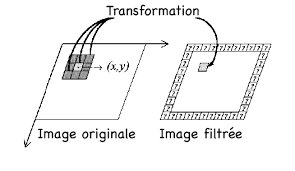
<h3>Seuillage : </h3>
Les estimateurs de seuillage furent introduits par
Donoho et Johnstone pour des bases
arbitraires. Ils furent ensuite introduits dans les
méthodes d’ondelettes au début des années 90 dans
une série d’articles de Donoho et Johnstone
et de Donoho, Johnstone, Kerkyacharian et Picard
. L’idée sous-jacente était de
reconstruire le signal uniquement à l’aide des
coefficients empiriques dont la valeur absolue était
supérieure à un seuil fixé. Cette idée est vite montrée
très performante tant au point de vue théorique que
pratique.$\\$
<img src="http://www-sop.inria.fr/epidaure/personnel/soler/orasis97/seuillage3.gif">
<h2>2.2. Méthodes basé sur l'apprentissage approfondie "Deep Learning" :</h2>
<h3>REDNet — Residual Encoder-Decoder Networks : </h3> 
<img src="https://cdn-images-1.medium.com/max/892/1*fFUmJ4nThqm-CbPS7xs07A.png">
<h3>PRIDNet — Pyramid Real Image Denoising Network : </h3> 
<img src="https://cdn-images-1.medium.com/max/1024/1*d0b4HFG9uslzF9GcFJTpwQ.png">
<h3>MWCNN — Multi-level Wavelet CNN : </h3> 
<img src="https://cdn-images-1.medium.com/max/1024/1*694Kp_Er6KYmk1dQWhfV_w.png">


### Dans ce travail on va s'interesser dans diverses méthodes de débruitage d’images; les deux types des méthodes classiques ( Seuillage et Filtrage) et pour les méthodes deep learning on va utiliser uniquement la méthode REDNet car elle est la plus facile dans l'implémentation.
### Vers la fin de ce projet, on va implémenter, evaluer puis comparer les différents méthodes utiliser afin d'élaborer une conclusion sur les meilleurs techniques de traitement d’image

<h1>3. Seuillage</h1> $\\$
D’après la défnition générale de Coiffman Wickerhauser dans le débruitage par ondelette
revient à l’extraction d’une structure cohérente du signal traité ce qui revient à considérer le bruit
comme non cohérent par rapport à la base d’ondelette choisie, donc non corrélé avec les fonctions
de base. En fait les coefficients peu corrélés avec la base sont faibles, et sont attribués au bruit. Par
un seuil adapté, on peut séparer le bruit (partie incohérente) du signal (partie cohérente). Le
débruitage par ondelettes classique est donc implémenté comme un ltrage non linéaire par
seuillage : Les coeficients d’ondelette supérieurs à un seuil T sont considérés comme faisant partie
du signal informatif.$\\$
Dans la littérature, on trouve plusieurs méthodes
de seuillage, dont les plus connues et appliquées sont :
<h3>Le seuillage doux ("Soft Thresholding »)</h3>
Le seuillage doux conduit à
mettre à zéro les valeurs de coefficients qui sont
plus petites que le seuil T et à ne conserver que ce
qui dépasse le seuil pour les autres coefficients.
Le signal après seuillage s’écrit: <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSNvL9sWHmjKVtnRE2ug2pilPXK_76wWq46w&usqp=CAU" width="300"> $\\$

D'une façon plus simple:$\\$
si |x| $\leq$ $\lambda$ : S(x,$\lambda$)=0

si x > $\lambda$ : S(x,$\lambda$)= x- $\lambda$  $\\$
si x < - $\lambda$ : S(x,$\lambda$)= x+ $\lambda$ 

In [1]:
from PIL import Image
import PIL
from numpy import array
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def Soft_Thresholding (pic,s):
    for i in range(pic.shape[0]):
        for j in range(pic.shape[1]):
            if (abs(pic[i][j])<s).any():
                pic[i][j]=0
            elif (abs(pic[i][j])> s).any():
                pic[i][j]= (abs(pic[i][j])-s)*(pic[i][j]/abs(pic[i][j]))

In [4]:
img=Image.open("pic1.png")
#img.show()
pic=array(img)
Soft_Thresholding(pic,53)
image =PIL.Image.fromarray(pic,"RGB")
#image.show()
image=image.save("pic1_seuil_doux.png")

<p>La fonction de seuillage ci-dessus a des avantages et des inconvénients:</p>
 <ul>
  <li>Le seuillage doux n’est pas ef cace pour les grands coeffcients.</li>
  <li>En raison des discontinuités de la fonction de seuillage dur, les résultats ont tendance à avoir une grande variance et être instables</li>
</ul> 
Pour remédier aux inconvénients du seuillage dur et doux, Bruce et Gao appliquent le non négatif
garrote dans la technique du seuillage par ondelette. Le seuillage non-négatif garrote a été d'abord
présenté par Breiman et est dé ni comme suit : $\\$
si |x| $\leq$ $\lambda$ : S(x,$\lambda$)=0 $\\$
si |x| > $\lambda$ : S(x,$\lambda$)= x-$\frac{\lambda²}{x}$

In [5]:
def Non_Negatif_Soft_Thresholding (pic,s):
    for i in range(pic.shape[0]):
        for j in range(pic.shape[1]):
            if (abs(pic[i][j]) <= s).any():
                pic[i][j]=0
            else :
                pic[i][j]= pic[i][j]-((s**2)/pic[i][j])

In [6]:
img=Image.open("pic1.png")
#img.show()
pic=array(img)
Non_Negatif_Soft_Thresholding(pic,53)
image =PIL.Image.fromarray(pic,"RGB")
#image.show()
image=image.save("pic1_seuil_doux_2.png")

Avant seuillage <img src="pic1.png" width="300" height="300"> 
Aprés le seuillage doux <img src="pic1_seuil_doux.png" width="300" height="300"> 
Aprés le seuillage doux non-négatif <img src="pic1_seuil_doux_2.png" width="300" height="300"> 

<h1>4. Filtrage</h1> $\\$

<h3>Le filtre moyen</h3>
Le filtre moyen est le filtre linéaire optimal pour le bruit de Gauss. Il s’agit du filtrage le plus simple
qui soit, consistant à remplacer la valeur d’un pixel par la valeur moyenne des pixels dans une
fenêtre centrée sur le pixel en question. Cela réduit sensiblement le bruit, dont l’écart-type est réduit
de la racine carrée du nombre total de pixels dans la fenêtre. Cependant ce moyennage qui ne tient
pas compte des statistiques locales de l’image produit une forte dégradation de
contours. Afin de minimiser ce phénomène, on utilise généralement des petites fenêtres,
typiquement 3*3 ou 5*5 $\\$

In [7]:
def Median_Filter(pic,k):
    w,h,c=pic.shape
    s=k//2
    _img=np.zeros((w+2*s,h+2*s,c), dtype=np.float)
    _img[s:s+w,s:s+h]=img.copy()#.astype(np.float)
    dst=_img.copy()
    
    for x in range(w):
        for y in range(h):
            for z in range(c):
                dst[x+s,y+s,z]=np.median(_img[x:x+k,y:y+k,z])
                
    dst=dst[s:s+w,s:s+h].astype(np.uint8)
    return dst

In [8]:
img=Image.open("pic1.png")
#img.show()
pic=array(img)
Median_Filter(pic,3)
image =PIL.Image.fromarray(pic,"RGB")
image=image.save("pic1_filtred3.png")
#image.show()
pic=array(img)
Median_Filter(pic,5)
image =PIL.Image.fromarray(pic,"RGB")
#image.show()
image=image.save("pic1_filtred5.png")

Avant Filtrage <img src="pic1.png" width="300" height="300"> 
Aprés Filtrage 3x3 <img src="pic1_filtred3.png" width="300" height="300"> 
Aprés Filtrage 5x5 <img src="pic1_filtred5.png" width="300" height="300"> 

<h1>5. REDNet - Residual Encoder-Decoder Networks :</h1> $\\$
Cette section présente le modèle de dénotation, la structure de réseau de REDNet, la structure globale du réseau récursif et le processus de débruitage des images.$\\$
<strong>Les réseaux encoders-décodeurs résiduels (Residual Encoder-Decoder Networks) </strong>sont une architecture de réseau de neurones utilisée pour les tâches de segmentation d'image. Ils utilisent une structure encoder-décodeur où l'encoder permet de réduire la dimension de l'image d'entrée, tandis que le décodeur permet de restaurer l'image d'entrée à sa taille originale tout en préservant les caractéristiques importantes de l'image. Les connections résiduelles sont utilisées pour assurer que l'information est conservée tout au long de l'encodage et décodage.

On va travailler sous la base de données <strong>MINST</strong>
## Importer les bibliothèques nécessaires

In [10]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras.layers import Input, add
from keras.layers import Layer,Dense,Dropout,Activation,Flatten,Reshape
from keras.layers.convolutional import Conv2D,MaxPooling2D,UpSampling2D,ZeroPadding2D

## Importer et adopter les images de MINST
MNIST est un ensemble de données populaire utilisé pour l'apprentissage automatique et l'analyse de données. Il contient des images de chiffres manuscrits (de 0 à 9) avec leur étiquette correspondante (le chiffre représenté par l'image). Il est souvent utilisé comme jeu de données de test pour les modèles d'apprentissage automatique, en particulier pour les réseaux de neurones, car il est relativement simple et facile à utiliser. Il comporte 60 000 images d'entraînement et 10 000 images de test. Il est souvent utilisé pour des tâches de classification.

In [11]:
(X_train,_),(X_test,_)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype("float32")
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype("float32")

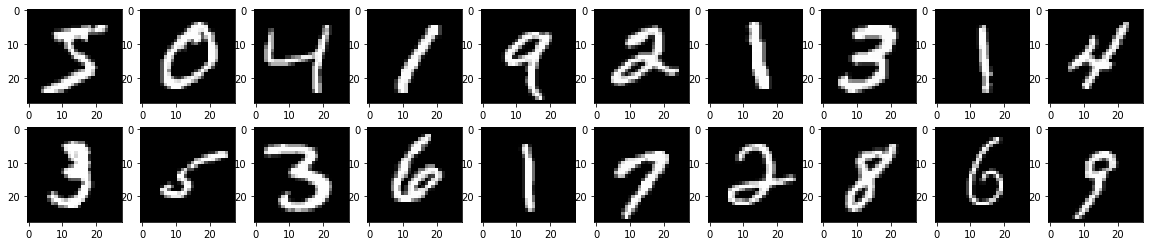

In [12]:
fig, axes = plt.subplots(2,10, figsize = (20, 4))

count = 0

for i in range(2):
    for j in range(10):
        axes[i,j].imshow(X_train[count], cmap = 'gray')
        count+=1

In [13]:
# Normaliser les données
X_train=X_train/255.0
X_test=X_test/255.0

## Ajouter le bruit avec une distribution normale

In [14]:
noise_factor = 0.1

X_train_noise = X_train + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_train.shape)
X_test_noise = X_test + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_test.shape)

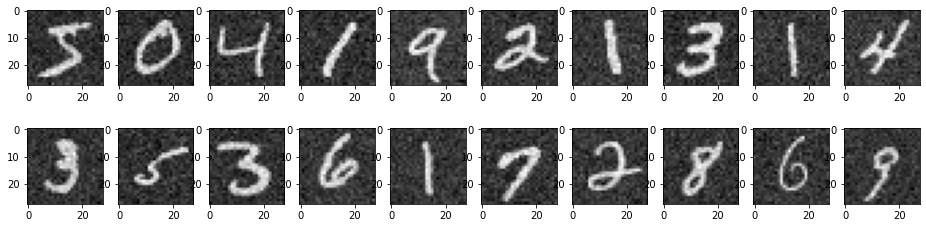

In [15]:
fig, axes = plt.subplots(2,10, figsize = (16,4))

count = 0
for i in range(2):
    for j in range(10):
        axes[i,j].imshow(X_train_noise[count], cmap = 'gray')
        count+=1

In [16]:
X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 28 ,28, 1)
X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], 28,28,1)

Notre images à debruitées sont prêts, donc maintenants on va créer et entrainer notre modèle REDNet.
## Creation du modèle

In [18]:
# Encoder
encoder_input = Input(shape = X_train.shape[1:])
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoder_input)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
encoded = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)

In [19]:
# Decoder
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D()(x)
decoded = Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')(x)

In [20]:
autoencoder = Model(encoder_input, decoded, name = 'Denoising_Model')
autoencoder.summary()

Model: "Denoising_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 32)      

## Entrainer le réseau 

In [21]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')

history = autoencoder.fit(X_train_noise, X_train, batch_size = 128, epochs = 3,  validation_split = 0.25, verbose = 1)

decoded_imgs = autoencoder.predict(X_test_noise)

2023-01-13 20:08:18.630530: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 141120000 exceeds 10% of free system memory.
2023-01-13 20:08:18.686282: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 141120000 exceeds 10% of free system memory.


Epoch 1/3
  1/352 [..............................] - ETA: 6:25 - loss: 0.6966

2023-01-13 20:08:19.995013: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31610880 exceeds 10% of free system memory.
2023-01-13 20:08:19.995081: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31610880 exceeds 10% of free system memory.
2023-01-13 20:08:20.047891: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 24837120 exceeds 10% of free system memory.


352/352 [==============================] - 59s 164ms/step - loss: 0.1385 - val_loss: 0.0832
Epoch 2/3
352/352 [==============================] - 55s 157ms/step - loss: 0.0786 - val_loss: 0.0776
Epoch 3/3
313/313 [==============================] - 3s 8ms/step


## Resultat obtenus

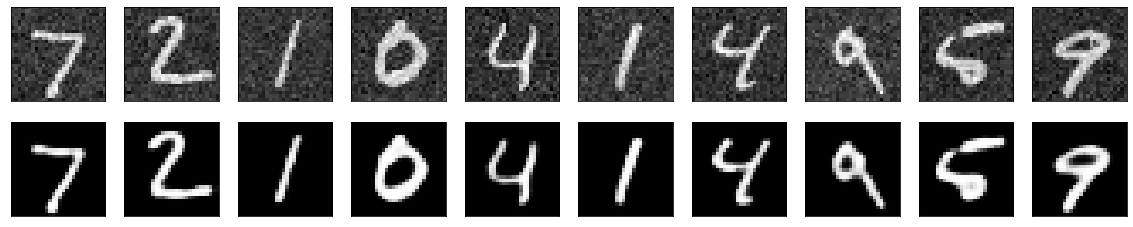

In [22]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noise[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## Essayer une méthode usuelle sur les images de MNIST

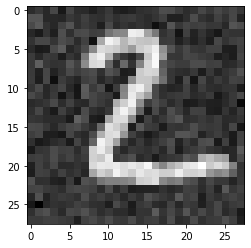

In [23]:
plt.imshow(X_test_noise[1])

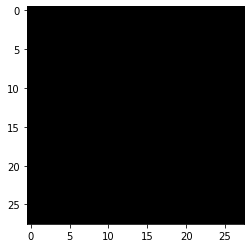

In [24]:
pic=array(X_test_noise[1])
Non_Negatif_Soft_Thresholding(pic,53)
plt.imshow(pic)
#image =PIL.Image.fromarray(pic,"RGB")
#image.show()
#image=image.save("pic1_seuil_doux_2.png")

<h1>Conclusion</h1>
En raison de la difficulté de modélisation des caractéristiques statistiques dans le domaine de l’image ou de faible résolution de l'image, les méthodes existantes de traitement direct des images reconstruites ne peuvent pas éliminer le bruit de l’image tout en maintenant les détails de la structure de l’image. </br>Le deep learning offre un grand potentiel pour la recherche sur la restauration des artefacts sonores des images. </br>Ce projet propose des méthode de débruitage d’image. Il est principalement divisé en deux parties : $\\$
(1) Les bases d’ondelettes permettent de bien approcher sur un petit nombre de coefficients les
signaux réguliers par morceaux.
Ces bonnes capacités d’approximation non linéaire conditionnent l’efficacité d’un
débruitage du signal par seuillage des coefficients d’ondelettes. Le débruitage par ondelettes
à des avantages importants sur d'autres techniques plus utilisées.$\\$
(2) le réseau RED  qui est utilisé pour restaurer les images CT bruyantes, et la notion de récursivité est intégrée dans le réseau RED pour réduire la complexité du réseau et augmenter l’efficacité opérationnelle. Il utilise une architecture encoder-décoder, qui consiste à utiliser une partie du réseau pour encoder l'image bruitée en une représentation de faible dimension, puis une autre partie pour décoder cette représentation en une image débruitée.

Il est important de rappeler que le débruitage d'image est une tâche difficile et que les méthodes courantes ont encore des limitations. Les perspectives d'amélioration peuvent inclure l'utilisation de méthodes d'apprentissage automatique plus avancées, telles que les réseaux de neurones profonds, ainsi que la combinaison de différentes méthodes pour améliorer les performances globales.